# Assignment 1
## Author Details
Name: **Yelisetty Karthikeya S M**

Roll No: **21CS30060**

---

## Importing Libraries

In [1]:
# Base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from tqdm import tqdm
from pickle import dump

# Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializations
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

---
## Data Preprocessing and Exploratory Data Analysis

### Loading dataset

In [2]:
df = pd.read_csv("./heart_disease_prediction/framingham.csv")

### Sample data

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Null Values inspection

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Simple solution is to drop the rows with missing values. But this is not a good solution as we might lose some important information.
<br/>So, we will use imputation to fill in the missing values using the mode of the column for nominal values and mean for continuous values.

In [7]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Changing the data types

In [9]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

These are the specifications according to the dataset description:

In [10]:
nominals = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
continuous = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

df[nominals] = df[nominals].astype('int64')
df[continuous] = df[continuous].astype('float64')

In [11]:
df.dtypes

male                 int64
age                float64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### Dividing the dataset into features and target

In [12]:
df_features = df.drop('TenYearCHD', axis=1)
df_target = df['TenYearCHD']

### Normalizing the data

In [13]:
scale = StandardScaler()
df_features[continuous] = scale.fit_transform(df_features[continuous])

### Correlation Heatmap

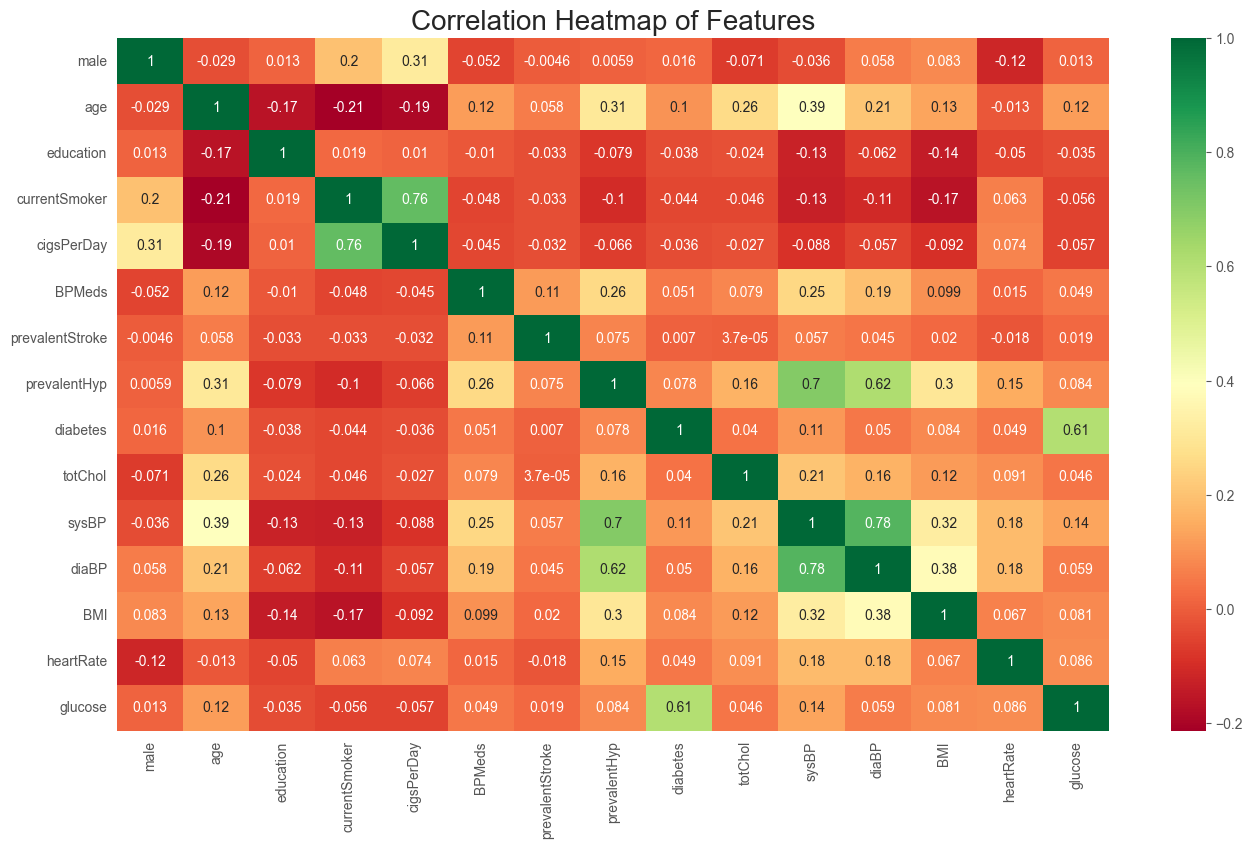

In [14]:
plt.figure(figsize=(16, 9))
sns.heatmap(df_features.corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap of Features", fontsize=20)
plt.show()

### Distribution of individual features

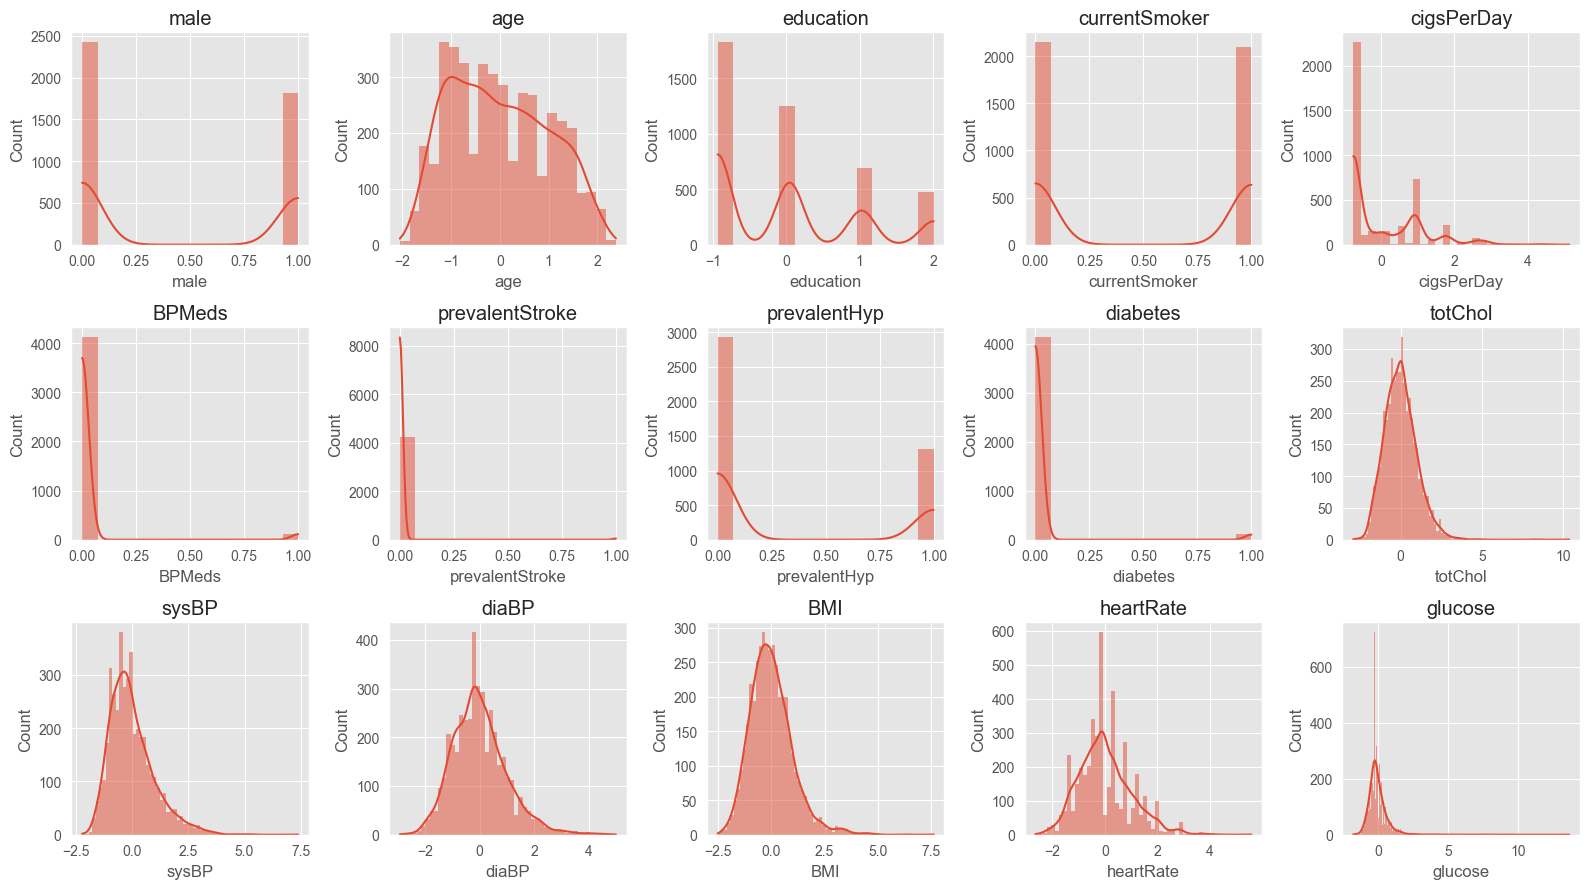

In [15]:
# Distribution of individual features
plt.figure(figsize=(16, 9))
for i, col in enumerate(df_features.columns):
    plt.subplot(3, 5, i+1)
    sns.histplot(df_features[col], kde=True, linewidth=0)
    plt.title(col)
plt.tight_layout()
plt.show()

### Class Distribution

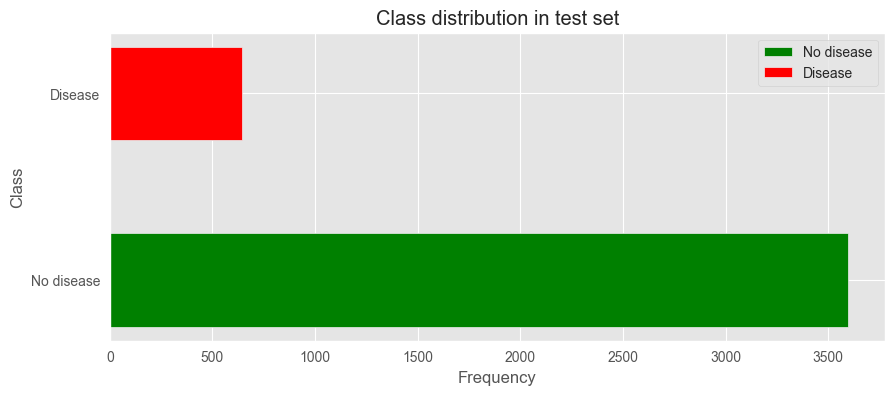

In [16]:
values = df_target.value_counts()
indices = [k for k in values.index]
plt.figure(figsize=(10,4))
plt.title('Class distribution in test set')
plt.barh(indices, values, color=['green', 'red'], label=['No disease', 'Disease'], height=0.5)
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.yticks(indices, ['No disease', 'Disease'])
plt.legend()
plt.show()

### Function to load and preprocess the data

In [17]:
def load_data():
    df = pd.read_csv("./heart_disease_prediction/framingham.csv")
    nominals = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
    continuous = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
    for col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    df[nominals] = df[nominals].astype('int64')
    df[continuous] = df[continuous].astype('float64')
    df_features = df.drop('TenYearCHD', axis=1)
    df_target = df['TenYearCHD']
    scale = StandardScaler()
    df_features[continuous] = scale.fit_transform(df_features[continuous])
    return df_features, df_target

---
## Feature Selection and Scaling

In [18]:
# PCA
pca = PCA()
pca.fit(df_features)
df_pca = pca.transform(df_features)

### Number of Components vs. Variance Explained

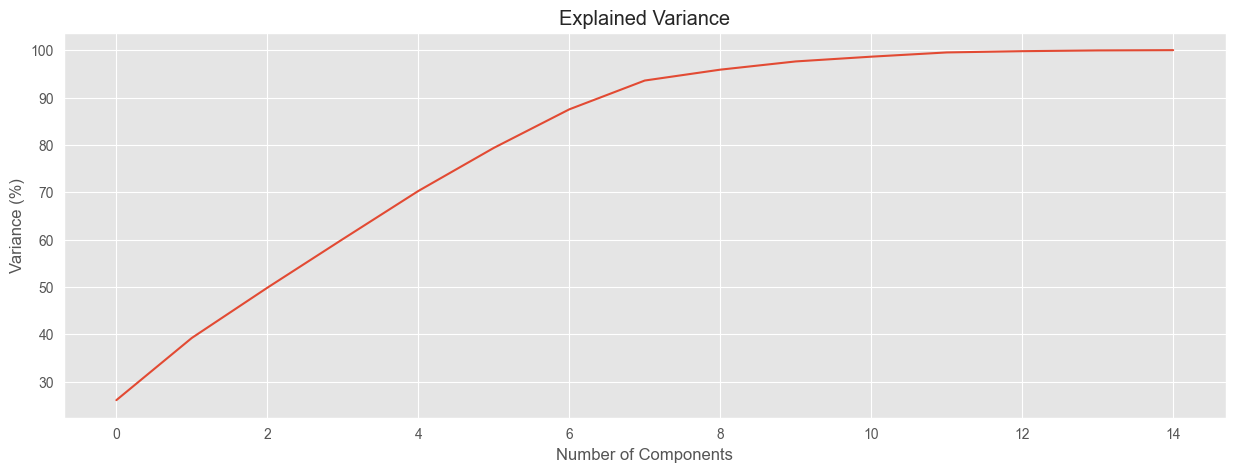

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.grid(visible=True)
plt.show()

### Dataset after PCA

As the elbow point is at 7, we will reduce the number of features to 7.

In [20]:
number_of_components = 7
df_features = pd.DataFrame(df_pca[:, :number_of_components], columns=[f'PC{i}' for i in range(1, number_of_components+1)])
df_features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.962665,-0.306698,-1.240161,1.541623,0.783884,-0.377466,0.881480
1,0.125056,-0.014960,0.090382,0.553265,0.502263,-1.724939,0.985375
2,-0.488438,0.799507,0.491221,-1.150302,-0.407634,0.038308,0.087517
3,1.273526,0.929873,-0.106130,0.309940,-0.382192,2.370008,-0.456905
4,-0.397436,1.362755,0.597880,1.248440,-1.026758,-0.033045,0.159698


In [21]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     4240 non-null   float64
 1   PC2     4240 non-null   float64
 2   PC3     4240 non-null   float64
 3   PC4     4240 non-null   float64
 4   PC5     4240 non-null   float64
 5   PC6     4240 non-null   float64
 6   PC7     4240 non-null   float64
dtypes: float64(7)
memory usage: 232.0 KB


### Correlation Heatmap after PCA

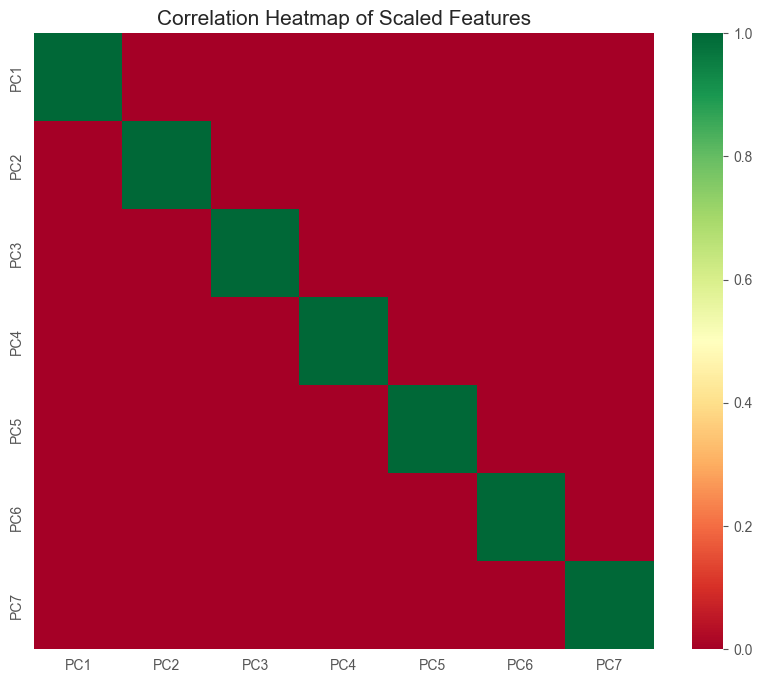

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_features.corr(), annot=False, cmap="RdYlGn")
plt.title("Correlation Heatmap of Scaled Features", fontsize=15)
plt.show()

### Function to perform feature selection and scaling

In [23]:
# We selected number of components as 7, because it explains 92% of the variance and is an elbow point in the graph.
def feature_selection(df, number_of_components: int = 7):
    # df is df_features in our case
    pca = PCA()
    pca.fit(df)
    df_pca = pca.transform(df)
    df = pd.DataFrame(df_pca[:, :number_of_components], columns=[f'PC{i}' for i in range(1, number_of_components+1)])
    return df

---

## Splitting the data into train and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3392, 7)
X_test shape: (848, 7)
y_train shape: (3392,)
y_test shape: (848,)


In [25]:
df_target.value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

### Class Distribution

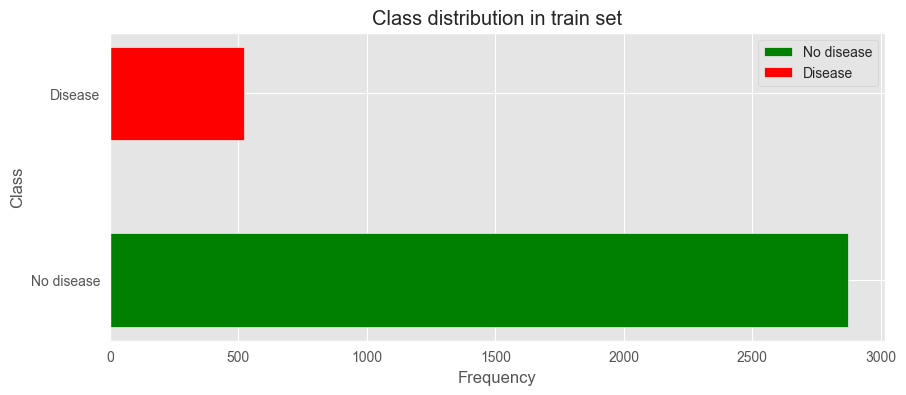

In [26]:
values = y_train.value_counts()
indices = [k for k in values.index]
plt.figure(figsize=(10,4))
plt.title('Class distribution in train set')
plt.barh(indices, values, color=['green', 'red'], label=['No disease', 'Disease'], height=0.5)
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.yticks(indices, ['No disease', 'Disease'])
plt.legend()
plt.show()

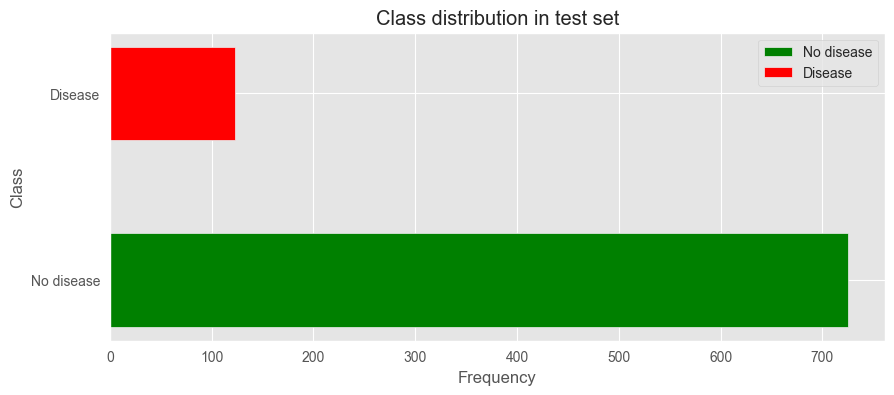

In [27]:
values = y_test.value_counts()
indices = [k for k in values.index]
plt.figure(figsize=(10,4))
plt.title('Class distribution in test set')
plt.barh(indices, values, color=['green', 'red'], label=['No disease', 'Disease'], height=0.5)
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.yticks(indices, ['No disease', 'Disease'])
plt.legend()
plt.show()

### Function to split the data into train and test sets

In [28]:
def split(df_features, df_target, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

---
## Resampling

> SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. <br/>
> This algorithm helps to overcome the overfitting problem posed by random oversampling.

As the dataset is imbalanced, we will use SMOTE to oversample the minority class.

In [29]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

In [30]:
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)

X_train_smote shape: (5742, 7)
y_train_smote shape: (5742,)


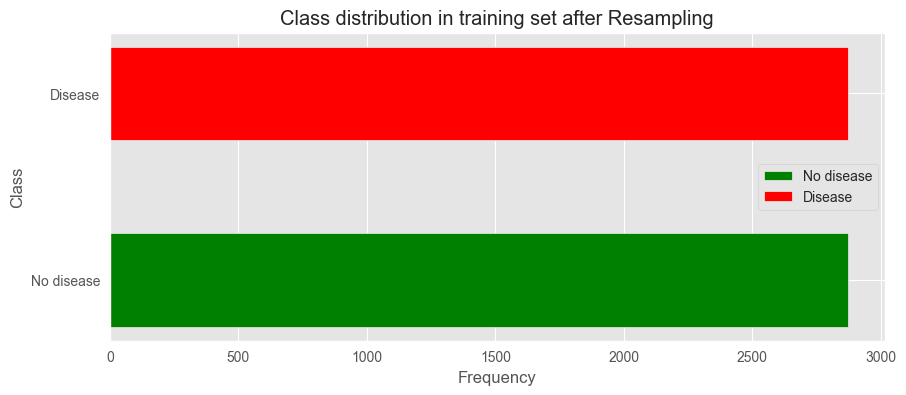

In [31]:
values = y_train_smote.value_counts()
indices = [k for k in values.index]
plt.figure(figsize=(10, 4))
plt.title('Class distribution in training set after Resampling')
plt.barh(indices, values, color=['green', 'red'], label=['No disease', 'Disease'], height=0.5)
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.yticks(indices, ['No disease', 'Disease'])
plt.legend()
plt.show()

### Function to perform resampling

In [32]:
def resample(X_train, y_train):
    X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

---
## Model Pipelines

In [33]:
# Logistic Regression Model Pipeline
logistic_pipeline = Pipeline([
    ('Logistic Regression', LogisticRegression(solver='saga', max_iter=10000))
])

# SVM Model Pipeline
linear_svc_pipeline = Pipeline([
    ('Support Vector Machine', SVC())
])

# Decision Tree Model Pipeline
decision_tree_pipeline = Pipeline([
    ('Decision Tree', DecisionTreeClassifier())
])

# KNN Model Pipeline
knn_pipeline = Pipeline([
    ('K Nearest Neighbors', KNeighborsClassifier())
])

pipelines = [logistic_pipeline, linear_svc_pipeline, decision_tree_pipeline, knn_pipeline]

---
## Modelling & Evaluation

In [34]:
# Train the models with cross validation
def train_model_cv(model_pipeline: Pipeline, X_train, y_train):
    cross_validate_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], return_train_score=True)
    return cross_validate_results

In [35]:
results = []
for pipeline in tqdm(pipelines):
    results.append(train_model_cv(pipeline, X_train_smote, y_train_smote))

100%|██████████| 4/4 [00:08<00:00,  2.22s/it]


### Results comparison of different models

In [36]:
table = []
for i in range(len(pipelines)):
    table.append([
        list(pipelines[i].named_steps.keys())[0], 
        results[i]['test_accuracy'].mean(), results[i]['test_precision'].mean(), 
        results[i]['test_recall'].mean(), results[i]['test_f1'].mean()
    ])
print(tabulate(table, headers=['Model', 'Accuracy', 'Precision', 'Recall', 'f1-score'], tablefmt='grid'))

+------------------------+------------+-------------+----------+------------+
| Model                  |   Accuracy |   Precision |   Recall |   f1-score |
+========================+============+=============+==========+============+
| Logistic Regression    |   0.664406 |    0.665482 | 0.660752 |   0.663071 |
+------------------------+------------+-------------+----------+------------+
| Support Vector Machine |   0.706549 |    0.68874  | 0.753751 |   0.719744 |
+------------------------+------------+-------------+----------+------------+
| Decision Tree          |   0.762977 |    0.739813 | 0.812616 |   0.774393 |
+------------------------+------------+-------------+----------+------------+
| K Nearest Neighbors    |   0.811564 |    0.736243 | 0.971438 |   0.837575 |
+------------------------+------------+-------------+----------+------------+


---
## Inferencing

### Problem Statement and Dataset Description
Heart disease is a major cause of death worldwide. <br/>
The main objective of this project is to predict whether a person has heart disease or not based on the given features. <br/>
The dataset contains 15 features and 1 target variable. <br/>

### Preprocessing
The dataset is imbalanced. So, we have used SMOTE to oversample the minority class. <br/>
PCA is used to reduce the number of features to 7. <br/>
The dataset is then split into train and test sets. <br/>

### Training
I have used 4 models: Logistic Regression, Support Vector Machine, Decision Tree and K-Nearest Neighbors. <br/>
The models are trained using 5-fold cross validation with the following results of mean accuracy, precision, recall, f1 score and roc auc score: <br/>

| Model                  |   Accuracy |   Precision |   Recall |   F1 Score |   ROC AUC |
|---                     |---         |---          |---       |---         |---        |
| Logistic Regression    |   0.673065 |    0.672859 | 0.673684 |   0.673227 |  0.728765 |
| Support Vector Machine |   0.70418  |    0.689422 | 0.743344 |   0.715261 |  0.771742 |
| Decision Tree          |   0.763003 |    0.74574  | 0.799071 |   0.771323 |  0.763003 |
| K Nearest Neighbors    |   0.811765 |    0.735244 | 0.974923 |   0.838154 |  0.917557 |

### Strengths and weaknesses of the models

#### Logistic Regression:
- **Strengths:**
  - **Balanced Performance:** Logistic regression shows a relatively balanced performance across accuracy, precision, recall, and F1 score.
  - **Interpretability:** Coefficients of logistic regression provide insights into the importance of features.

- **Weaknesses:**
  - **Limited Predictive Power:** The model may not capture complex non-linear relationships effectively, reflected in slightly lower performance compared to other models.

#### Support Vector Machine (SVM):
- **Strengths:**
  - **High Recall:** SVM shows high recall, indicating its effectiveness in identifying true positives (patients with heart disease) accurately.
  - **Non-Linear Decision Boundary:** SVM effectively models non-linear relationships.

- **Weaknesses:**
  - **Complexity and Computation:** SVM tends to be computationally intensive, especially as the dataset size grows.
  - **Sensitivity to Hyperparameters:** Performance is sensitive to kernel choice and hyperparameter tuning.

#### Decision Tree:
- **Strengths:**
  - **High Recall:** Decision trees demonstrate a high recall, indicating effective identification of individuals with heart disease.
  - **Interpretability:** Easy to interpret and explain due to its hierarchical structure.

- **Weaknesses:**
  - **Overfitting:** Prone to overfitting, as reflected in the difference in performance between training and testing data.

#### K Nearest Neighbors (KNN):
- **Strengths:**
  - **High Recall:** KNN shows very high recall, suggesting it effectively identifies individuals with heart disease, minimizing false negatives.
  - **Non-Parametric and Lazy Learning:** KNN is non-parametric and adapts to any new data without retraining.

- **Weaknesses:**
  - **Computationally Intensive:** The model is computationally intensive, especially as the dataset size increases.
  - **Sensitivity to Distance Metric:** Performance can vary based on the choice of distance metric.

#### Overall Comparison:
- Decision Tree performs well, striking a balance between recall and precision. It is also interpretable, aiding understanding.
- Logistic Regression offers a good balance across metrics but may lack the predictive power compared to more complex models.
- SVM performs well, particularly in recall, but requires careful parameter tuning due to sensitivity.
- In this context, KNN stands out with very high recall, crucial for identifying individuals at risk of heart disease. However, it sacrifices precision, leading to a lower F1 score.

### Best Model

The best model is K-Nearest Neighbors with an accuracy of $81.12\%$ and roc auc score (efficiency) of $91.76\%$. <br/>
For the purpose of detecting heart disease, we would want to minimize the false negatives, i.e., the number of people who have heart disease but are predicted to not have heart disease as it is more dangerous. <br/>
So, we will choose the model with the highest recall, which is, again, K-Nearest Neighbors. <br/>

---
## Apply Model

### Loading and preprocessing the data

In [37]:
df_features, df_target = load_data()
df_features = feature_selection(df_features)
X_train, X_test, y_train, y_test = split(df_features, df_target)
X_train, y_train = resample(X_train, y_train)

### Training K-Nearest Neighbors model

In [38]:
model = KNeighborsClassifier()

In [39]:
history = model.fit(X_train, y_train)

### Predicting and Evaluating the model on the test set

In [40]:
y_pred = model.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       725
           1       0.21      0.49      0.29       123

    accuracy                           0.65       848
   macro avg       0.55      0.58      0.53       848
weighted avg       0.79      0.65      0.70       848



In [42]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred)*100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred):.6f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.6f}")

Accuracy: 65.21%
Precision: 20.55%
Recall: 48.78%
F1 Score: 0.289157
ROC AUC Score: 0.583902


---
## Saving the model

In [43]:
dump(model, open('model.pkl', 'wb'))